<a href="https://colab.research.google.com/github/Manojkumar063/main-data-science-project/blob/main/Copy_of_SYNTHETIC_STOCK_DATA_MYDATASCIENCE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data set for /content/synthetic_stock_data.csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate synthetic stock data
def generate_synthetic_stock_data(start_date, end_date, num_records):
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # Set frequency to business days
    stock_data = pd.DataFrame(index=date_range)
    stock_data['Open'] = np.random.uniform(low=100, high=200, size=(len(date_range),))
    stock_data['High'] = stock_data['Open'] + np.random.uniform(low=0, high=10, size=(len(date_range),))
    stock_data['Low'] = stock_data['Open'] - np.random.uniform(low=0, high=10, size=(len(date_range),))
    stock_data['Close'] = (stock_data['High'] + stock_data['Low']) / 2
    stock_data['Volume'] = np.random.randint(low=100000, high=500000, size=(len(date_range),))
    return stock_data

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    diff = data.diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Generate synthetic stock data
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 1, 1)
num_records = 500
stock_data = generate_synthetic_stock_data(start_date, end_date, num_records)

# Add RSI indicator
stock_data['RSI'] = calculate_rsi(stock_data['Close'].fillna(0))  # Ensure to handle NaN values

# Save the synthetic dataset to a CSV file
stock_data.to_csv('synthetic_stock_data.csv')



Random Forest Model:
Mean Squared Error: 840.9550603566661
Epoch 1/10
12/12 - 2s - loss: 23163.6777 - 2s/epoch - 204ms/step
Epoch 2/10
12/12 - 0s - loss: 23122.2168 - 41ms/epoch - 3ms/step
Epoch 3/10
12/12 - 0s - loss: 23077.5234 - 38ms/epoch - 3ms/step
Epoch 4/10
12/12 - 0s - loss: 23025.0645 - 37ms/epoch - 3ms/step
Epoch 5/10
12/12 - 0s - loss: 22962.1855 - 38ms/epoch - 3ms/step
Epoch 6/10
12/12 - 0s - loss: 22883.6289 - 38ms/epoch - 3ms/step
Epoch 7/10
12/12 - 0s - loss: 22789.9043 - 43ms/epoch - 4ms/step
Epoch 8/10
12/12 - 0s - loss: 22674.6914 - 38ms/epoch - 3ms/step
Epoch 9/10
12/12 - 0s - loss: 22541.6504 - 39ms/epoch - 3ms/step
Epoch 10/10
12/12 - 0s - loss: 22386.9688 - 37ms/epoch - 3ms/step
3/3 [==============================] - 1s 4ms/step

LSTM Model:
Mean Squared Error: 2893.678145341681

Random Forest Model:
Mean Squared Error: 840.9550603566661

Random Forest Feature Importance:
Moving_Avg_50    0.215253
Volume           0.213530
RSI              0.186477
High          

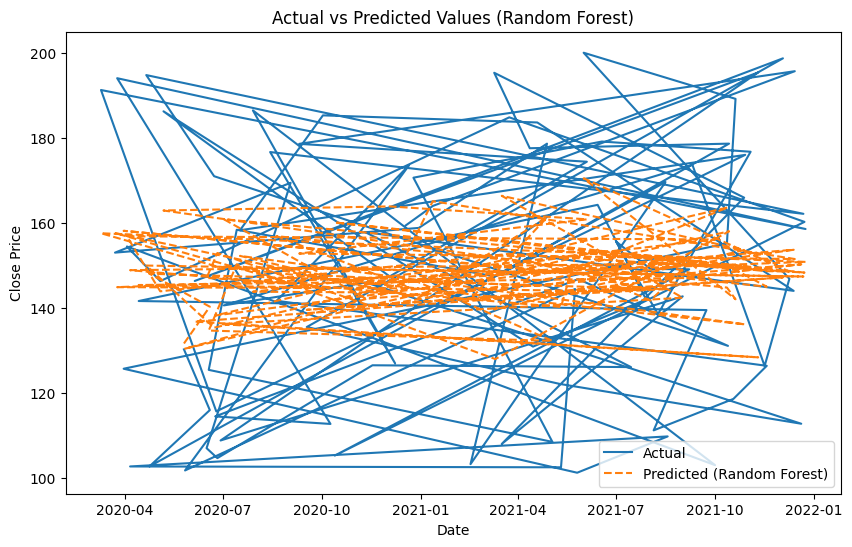

Epoch 1/10
12/12 - 2s - loss: 23149.1738 - 2s/epoch - 165ms/step
Epoch 2/10
12/12 - 0s - loss: 23111.7832 - 29ms/epoch - 2ms/step
Epoch 3/10
12/12 - 0s - loss: 23069.8730 - 34ms/epoch - 3ms/step
Epoch 4/10
12/12 - 0s - loss: 23019.9004 - 37ms/epoch - 3ms/step
Epoch 5/10
12/12 - 0s - loss: 22957.3867 - 32ms/epoch - 3ms/step
Epoch 6/10
12/12 - 0s - loss: 22880.4160 - 31ms/epoch - 3ms/step
Epoch 7/10
12/12 - 0s - loss: 22784.5723 - 31ms/epoch - 3ms/step
Epoch 8/10
12/12 - 0s - loss: 22670.6055 - 34ms/epoch - 3ms/step
Epoch 9/10
12/12 - 0s - loss: 22536.8750 - 32ms/epoch - 3ms/step
Epoch 10/10
12/12 - 0s - loss: 22384.5215 - 33ms/epoch - 3ms/step


3/3 [==============================] - 0s 5ms/step

LSTM Model:
Mean Squared Error: 2910.038545231511


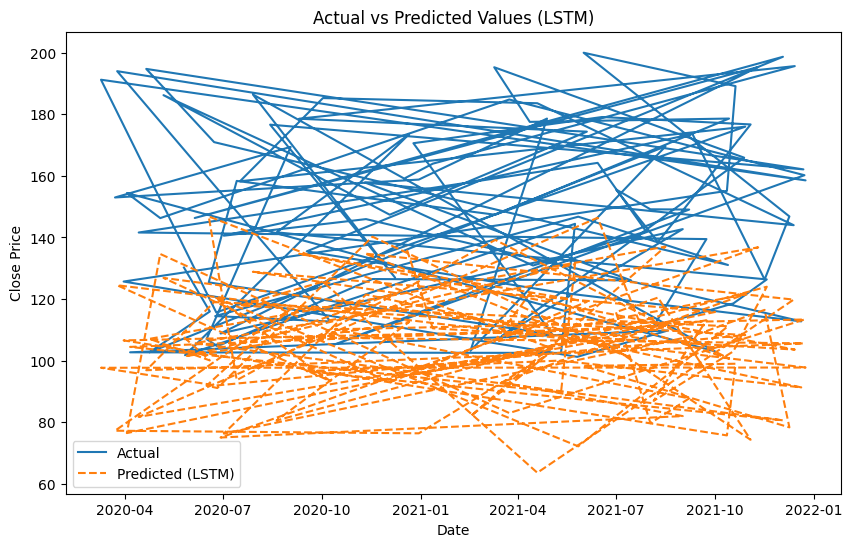

In [ ]:
3# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Function to generate synthetic stock data
def generate_synthetic_stock_data(start_date, end_date, num_records):
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # Set frequency to business days
    stock_data = pd.DataFrame(index=date_range)
    stock_data['Open'] = np.random.uniform(low=100, high=200, size=(len(date_range),))
    stock_data['High'] = stock_data['Open'] + np.random.uniform(low=0, high=10, size=(len(date_range),))
    stock_data['Low'] = stock_data['Open'] - np.random.uniform(low=0, high=10, size=(len(date_range),))
    stock_data['Close'] = (stock_data['High'] + stock_data['Low']) / 2
    stock_data['Volume'] = np.random.randint(low=100000, high=500000, size=(len(date_range),))
    return stock_data

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    diff = data.diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Generate synthetic stock data
start_date = '2020-01-01'
end_date = '2022-01-01'
num_records = 500
stock_data = generate_synthetic_stock_data(start_date, end_date, num_records)

# Save the synthetic dataset to a CSV file
stock_data.to_csv('/content/synthetic_stock_data.csv')

# Load historical stock price data
# Assuming you have a CSV file with columns: Date, Open, High, Low, Close, Volume
data = pd.read_csv('/content/synthetic_stock_data.csv')

# Feature engineering
data['Date'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Date', inplace=True)
data['Moving_Avg_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = calculate_rsi(data['Close'])

# Target variable
data['Next_Close'] = data['Close'].shift(-1)

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features and target variable
X = data.drop(['Close', 'Next_Close', 'Unnamed: 0'], axis=1)  # Adjust column names accordingly
y = data['Next_Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ... (Previous code)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print('\nRandom Forest Model:')
print(f'Mean Squared Error: {rf_mse}')

# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=2)

lstm_predictions = lstm_model.predict(X_test_lstm)

# Reshape predictions for inverse_transform
lstm_predictions = lstm_predictions.reshape(-1, 1)

# Inverse transform
lstm_predictions = scaler.inverse_transform(np.concatenate([X_test_scaled[:, 1:], lstm_predictions], axis=1))[:, -1]

lstm_mse = mean_squared_error(y_test, lstm_predictions)
print('\nLSTM Model:')
print(f'Mean Squared Error: {lstm_mse}')


# ... (Previous code)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Display Random Forest results
print('\nRandom Forest Model:')
print(f'Mean Squared Error: {rf_mse}')

# Feature Importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print('\nRandom Forest Feature Importance:')
print(feature_importance)

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, rf_predictions, label='Predicted (Random Forest)', linestyle='--')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=2)

lstm_predictions = lstm_model.predict(X_test_lstm)

# Reshape predictions for inverse_transform
lstm_predictions = lstm_predictions.reshape(-1, 1)

# Inverse transform
lstm_predictions = scaler.inverse_transform(np.concatenate([X_test_scaled[:, 1:], lstm_predictions], axis=1))[:, -1]

lstm_mse = mean_squared_error(y_test, lstm_predictions)

# Display LSTM results
print('\nLSTM Model:')
print(f'Mean Squared Error: {lstm_mse}')

# Plot actual vs predicted values for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, lstm_predictions, label='Predicted (LSTM)', linestyle='--')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

